### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [21]:
import math
exponent=math.sqrt(2)
for n in range(0,100):
    exponent=math.sqrt(2)**exponent
print exponent

2.0


### 3.1 Object-oriented version
Here we solve the same problem, introducing objects to Python.

A simplistic approach to 00 design is to identify the nouns in the problem description, and consider those to be potential *classes*. A class is a template, sort of like a cookie cutter for stamping out identical objects, ready for use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into classes.

The *methods* of a class represent the actions we expect of the objects created from the class.

In [61]:
##In Python, u can random choose a possibility, from a class of coins, for example.
##class setup: class name(object), then def __init__(self,character)

import numpy as np

class Coin(object):#we capitalize the names of classes.
    #define a constrctor, so that we can create instances(objects) of Coin:
    def __init__(self, probHeads):#two underline!!
        self.probHeads=probHeads
        
    def flipIsHead(self):
        return np.random.random()<self.probHeads #it will return true or false
    ##figure out random and its extension!
    
    def nextNFlipsAreHeads(self,n):
        for i in range(n):
            if not self.flipIsHead():
                return False
            return True
                

class CoinBag(object):
    def __init__(self):
        self.coins=[]
    def addCoin(self,coin):
        self.coins.append(coin)
    def pickRandomCoin(self):
        return np.random.choice(self.coins) #random.choice:choose from CoinBag

cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

# print cb.pickRandomCoin().probHeads

# c=Coin(0.6)
# print c.probHeads

firstFlipIsAHeadCounter=0
secondFlipIsAHeadCounter=0
for trialCtr in range(10000):
    randomCoin=cb.pickRandomCoin()
    if randomCoin.flipIsHead():
        firstFlipIsAHeadCounter+=1
        if randomCoin.flipIsHead():
            secondFlipIsAHeadCounter+=1
print float(secondFlipIsAHeadCounter)/firstFlipIsAHeadCounter
        

##needed to be added, check after class!

0.518709166502


In [56]:
# def nextNFlipsAreHeads(self,n):
#         for i in range(n):
#             if not self.flipIsHead():
#                 return False

#             return True
kick=0
for i in range(0,1000):
    randomCoin=cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10):
        kick +=1
print kick


515


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [34]:
import random as rnd
heads=0
for n in range(0,100000):
    ccoin=math.floor(rnd.random()/0.5)
    if ccoin==0:
        coin1=math.floor(rnd.random()/0.6)
        if coin1==1:
            coin1=math.floor(rnd.random()/0.6)
            heads+=coin1
    else:
        coin2=math.floor(rnd.random()/0.4)
        if coin2==1:
            coin2=math.floor(rnd.random()/0.4)
            heads+=coin2
print heads

##need to be corrected, first flip won't effect the second one

23896.0


In [41]:
import random as rnd
#assume tails 0 , head 1

def headsOrTails(probTails):
    if rnd.random()<probTails:
        return 0
    return 1

firstfliphead=0
secondfliphead=0

for trialCrt in range(0,100000):
    if rnd.random()<0.5:
        probTails=0.6
    else:
        probTails=0.4
    coin=headsOrTails(probTails)
    if coin==1:
        firstfliphead+=1
        secondfliphead+=headsOrTails(probTails)

headest = float(secondfliphead)/float(firstfliphead) #turn into float to show percentage or 
#change 0 to 0.0
print secondfliphead, firstfliphead, headest

##

26083 49880 0.52291499599


### Monte Hall Problem
You are a contestant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show host asks you if you'd like to switch doors. What do you do?

### 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [58]:
cb=CoinBag()
cb.addCoin(Coin(1))
[cb.addCoin(Coin(0.5)) for n in range(999)]
trialCounter=0
fairCoinCtr=0
for i in range(1000):
    randomCoin=cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10):
        trialCounter+=1
        if randomCoin.probHeads<1:
            fairCoinCtr+=1

print trialCounter,fairCoinCtr,float(fairCoinCtr)/trialCounter


504 502 0.996031746032


In [62]:
# def nextNFlipsAreHeads(self,n):
#         for i in range(n):
#             if not self.flipIsHead():
#                 return False

#             return True
kick=0
for i in range(0,1000):
    randomCoin=cb.pickRandomCoin()
    if randomCoin.nextNFlipsAreHeads(10):
        kick +=1
print kick


510


### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [1]:
import random as rnd
steps=0

def movestep(stage):
    if stage==1:
        return 2
    elif stage==2:
        if rnd.random()<2.0/3:
            return 3
        return 1
    elif stage==3:
        if rnd.random()<1.0/3:
            return 4
        return 2 

stage=1
for n in range(0,1000000):
    stage=1
    while stage<4:
        stage=movestep(stage)
        steps+=1

print steps

10005812


### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [83]:
class Spinner(object):
    def __init__(self):
        self.total=0
        self.num=0
        
    def spin(self):
        self.total+=np.random.random()
        self.num+=1
        
    def reset(self):
        self.total=0
        self.num=0

    def spinUtilgreater1(self):##loop
        while self.total<1:
            self.spin()
        answer=self.num ##count once, since it is hard to get total in def(restart from 0)
        self.reset() ##remember to have bracelet
        return answer ##return the result, or u will get nothing

spinner=Spinner()##give a name

Trial=1000 ##get interactive
totalnum=0
# for n in range(Trial):
#     totalnum+=spinner.spinUtilgreater1() ##not totalnum+=answer, since the result of spinUtilgreater1 is just a result instead of answer
# # print float(totalnum)/Trial  ##copy the names in case of wrong typing

trials=[spinner.spinUtilgreater1() for n in range(Trial)] ##set a matrix

Populating the interactive namespace from numpy and matplotlib


(array([ 0.496,  0.343,  0.12 ,  0.036,  0.005,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.]),
 <a list of 10 Patch objects>)

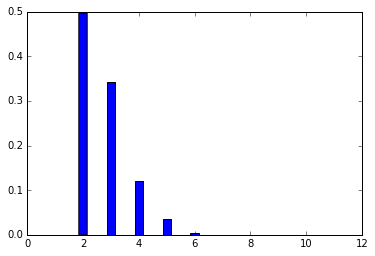

In [84]:
%pylab inline 
##get figure shown, not in the same line

import matplotlib.pyplot as plt

numbins=10
plt.hist(trials,  bins=numbins, normed=True, align='left', rwidth=0.3, range=(2,2+numbins))


### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?